In [16]:
import pandas as pd
from backtest import *

In [2]:
data_series = pd.read_hdf('/home/jacob/Desktop/Files/Personal_Files/Python/backtester/Testing files/testing_data/SPYTLT_test_data.h5',key = 'data')

In [19]:
data_series.index

Index(['SPY', 'TLT'], dtype='object')

In [4]:
data_series['SPY']

,open,close
Date,,
2002-07-30,89.320000,63.001911
2002-07-31,90.489998,63.154285
2002-08-01,90.879997,61.505451
2002-08-02,88.500000,60.126820
2002-08-05,86.489998,58.034615
...,...,...
2021-04-09,408.390015,411.489990
2021-04-12,410.850006,411.640015
2021-04-13,411.529999,412.859985


In [20]:
class Stock_Bond_Portfolio(Strategy):
    
    def strategy_logic_begin(self):
        pass
    
    def strategy_logic_end(self):
        if 'SPY' not in self.portfolio.positions and 'TLT' not in self.portfolio.positions:
            self.execution.market_order('SPY',100,'close')
            self.execution.market_order('TLT',100,'close')
        

test = Backtest(strategy = Stock_Bond_Portfolio)
test.datahandler.add_data_series(data_series)
test.test_strategy(bars_to_load = 200,cash = 1000000)

100%|██████████| 4711/4711 [00:18<00:00, 249.02it/s]


<AxesSubplot:>

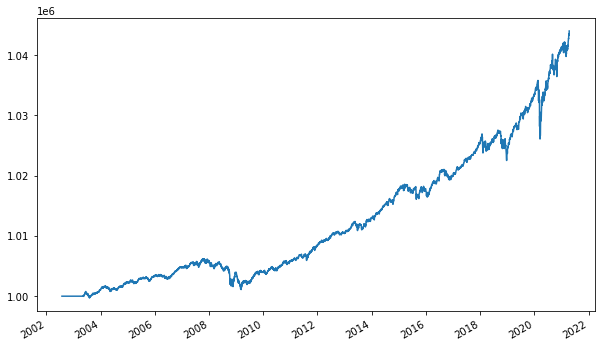

In [21]:
test.account.account_results.value.plot(figsize = (10,6))

In [22]:
test.account.account_history.to_excel('')

,assets,liabilities,equity
2002-07-30,{'cash': 1000000},{'borrowed funds': 0},{'account value': 1000000}
2002-07-31,"{'cash': 989361.8115, 'SPY': {'value': 6315.42...",{'borrowed funds': 0},{'account value': 1000000}
2002-08-01,"{'cash': 989502.0748000001, 'SPY': {'value': 6...",{'borrowed funds': 0},{'account value': 1000000.0}
2002-08-02,"{'cash': 989595.4155, 'SPY': {'value': 6012.68...",{'borrowed funds': 0},{'account value': 1000000.0}
2002-08-05,"{'cash': 989785.2558, 'SPY': {'value': 5803.46...",{'borrowed funds': 0},{'account value': 1000000.0}
...,...,...,...
2021-04-09,"{'cash': 988375.1503, 'SPY': {'value': 41148.9...",{'borrowed funds': 0},{'account value': 1043275.1488}
2021-04-12,"{'cash': 988375.1503, 'SPY': {'value': 41164.0...",{'borrowed funds': 0},{'account value': 1043284.1514999999}
2021-04-13,"{'cash': 988375.1503, 'SPY': {'value': 41285.9...",{'borrowed funds': 0},{'account value': 1043509.1484}
2021-04-14,"{'cash': 988375.1503, 'SPY': {'value': 41145.0...",{'borrowed funds': 0},{'account value': 1043324.1508}


In [13]:
test.account.account_history['assets'][10]

{'cash': 989308.2069,
 'SPY': {'value': 6163.7108,
  'quantity': 100,
  'start of position': Timestamp('2002-08-13 00:00:00'),
  'most recent order': {'Order ID': 18,
   'date of placement': Timestamp('2002-08-13 00:00:00'),
   'time of placement': 'end',
   'order type': 'market',
   'symbol': 'SPY',
   'quantity': 100,
   'desired execution time': 'close',
   'execution price': 61.637108,
   'date of execution': Timestamp('2002-08-13 00:00:00'),
   'execution side': 'end'},
  'cost basis': 6163.7108,
  'ladder': [(100, 61.637108)]},
 'TLT': {'value': 4528.0823,
  'quantity': 100,
  'start of position': Timestamp('2002-08-13 00:00:00'),
  'most recent order': {'Order ID': 19,
   'date of placement': Timestamp('2002-08-13 00:00:00'),
   'time of placement': 'end',
   'order type': 'market',
   'symbol': 'TLT',
   'quantity': 100,
   'desired execution time': 'close',
   'execution price': 45.280823,
   'date of execution': Timestamp('2002-08-13 00:00:00'),
   'execution side': 'end'},
